<a href="https://colab.research.google.com/github/Turusore08/Clustering-Ship-Performance-with-Hiearkial-clustering/blob/main/Clustering_Ship_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [ ]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeleeladekunlefijabi/ship-performance-clustering-dataset")

print("Path to dataset files:", path)

100%|██████████| 304k/304k [00:00<00:00, 74.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset/versions/1


In [ ]:
files = os.listdir(path)

csv_file = [file for file in files if file.endswith('.csv')][0]

df = pd.read_csv(os.path.join(path, csv_file))

In [ ]:
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [ ]:
df.isnull().sum()

,0
Date,0
Ship_Type,136
Route_Type,136
Engine_Type,136
Maintenance_Status,136
Speed_Over_Ground_knots,0
Engine_Power_kW,0
Distance_Traveled_nm,0
Draft_meters,0
Weather_Condition,136


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
Date,0
Ship_Type,0
Route_Type,0
Engine_Type,0
Maintenance_Status,0
Speed_Over_Ground_knots,0
Engine_Power_kW,0
Distance_Traveled_nm,0
Draft_meters,0
Weather_Condition,0


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

Dimencinety

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)
kmeans_score = silhouette_score(df_pca, kmeans_labels)
print(f"K-Means Score: {kmeans_score:.2f}")

K-Means Score: 0.34


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)
if len(set(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(df_pca, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_score:.2f}")
else:
    dbscan_score = "N/A"
    print("DBSCAN did not form any clusters.")

DBSCAN Silhouette Score: 0.49


In [ ]:
dendro = linkage(df_pca, method='ward')

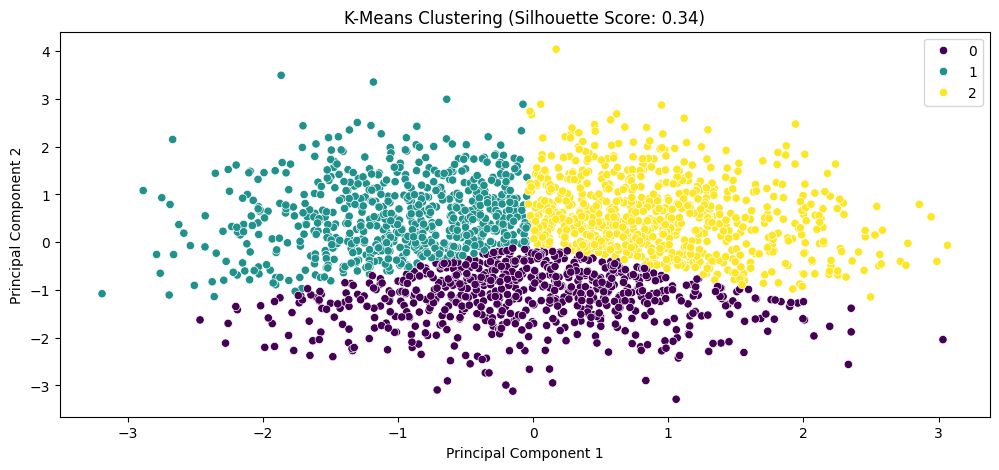

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'K-Means Clustering (Silhouette Score: {kmeans_score:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

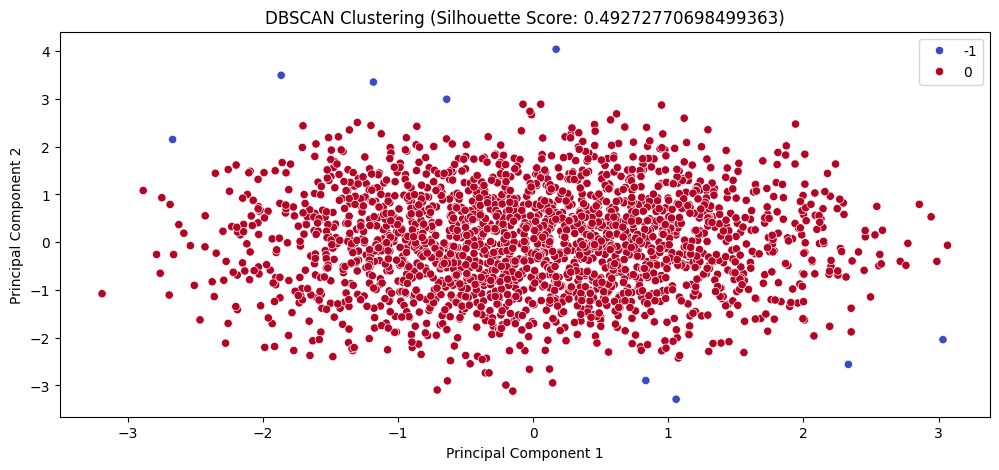

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=dbscan_labels, palette='coolwarm')
plt.title(f'DBSCAN Clustering (Silhouette Score: {dbscan_score})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

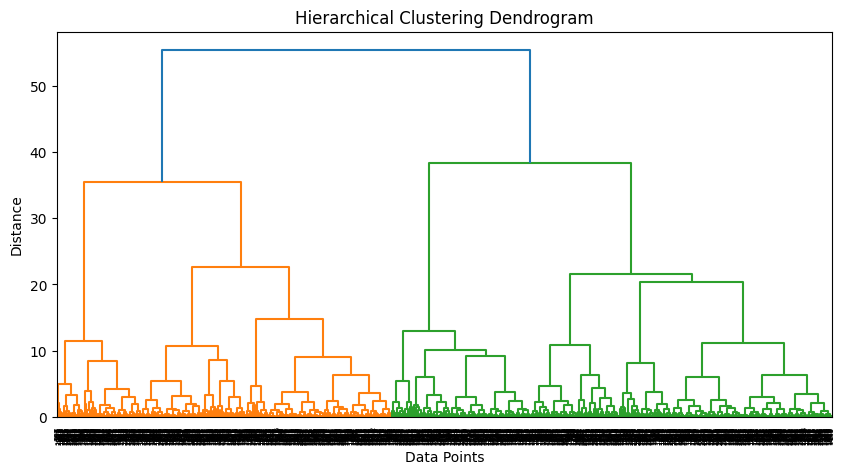

In [ ]:

plt.figure(figsize=(10, 5))
dendrogram(dendro)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()